In [1]:

import pandas as pd

# Loading in the data
pulls_one = pd.read_csv('pulls_2011-2013.csv') # Info about pull requests from 2011-2013
pulls_two = pd.read_csv('pulls_2014-2018.csv') # Info about pull request from 2014-2018
pull_files = pd.read_csv('pull_files.csv') # Files modified by the pull requests

In [2]:
pulls_one

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z
...,...,...,...
3291,547941,xeno-by,2011-12-01T16:16:42Z
3292,547354,szeiger,2011-12-01T14:03:23Z
3293,547150,odersky,2011-12-01T12:39:40Z
3294,547003,robinst,2011-12-01T11:42:26Z


In [3]:
pulls_two

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z
...,...,...,...
2899,11244241,folone,2014-01-06T09:07:34Z
2900,11240674,clhodapp,2014-01-06T03:52:23Z
2901,11234757,xeno-by,2014-01-05T12:23:24Z
2902,11231462,rklaehn,2014-01-04T22:42:02Z


In [4]:
print(type(pulls_two['date'][0]))

<class 'str'>


In [5]:
pull_files

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java
...,...,...
85583,547354,test/files/run/bitsets.check
85584,547354,test/files/run/bitsets.scala
85585,547150,src/compiler/scala/tools/nsc/transform/LiftCod...
85586,547150,src/library/scala/reflect/api/Trees.scala


In [6]:
# Combine the 2 dataframes containing the pull requests
pulls = pulls_two.append(pulls_one, ignore_index=True)

# The dates are in ISO 8601 format and loaded by Pandas as string
# Convert the date for the pull_requests object for easy comparison and sorting
pulls['date'] = pd.to_datetime(pulls['date'])

In [7]:
pulls

,pid,user,date
0,163314316,hrhino,2018-01-16 23:29:16+00:00
1,163061502,joroKr21,2018-01-15 23:44:52+00:00
2,163057333,mkeskells,2018-01-15 23:05:06+00:00
3,162985594,lrytz,2018-01-15 15:52:39+00:00
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00
...,...,...,...
6195,547941,xeno-by,2011-12-01 16:16:42+00:00
6196,547354,szeiger,2011-12-01 14:03:23+00:00
6197,547150,odersky,2011-12-01 12:39:40+00:00
6198,547003,robinst,2011-12-01 11:42:26+00:00


In [8]:
# Check the combined rows
pulls_one.shape[0] + pulls_two.shape[0]

6200

In [9]:
# Merge the two dataframes using inner join
data = pulls.merge(pull_files, on='pid') 

In [10]:
data

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java
...,...,...,...,...
85583,547354,szeiger,2011-12-01 14:03:23+00:00,test/files/run/bitsets.check
85584,547354,szeiger,2011-12-01 14:03:23+00:00,test/files/run/bitsets.scala
85585,547150,odersky,2011-12-01 12:39:40+00:00,src/compiler/scala/tools/nsc/transform/LiftCod...
85586,547150,odersky,2011-12-01 12:39:40+00:00,src/library/scala/reflect/api/Trees.scala


### visualize the activity of the project over the years to know if the project is still active.

<AxesSubplot:xlabel='year_month'>

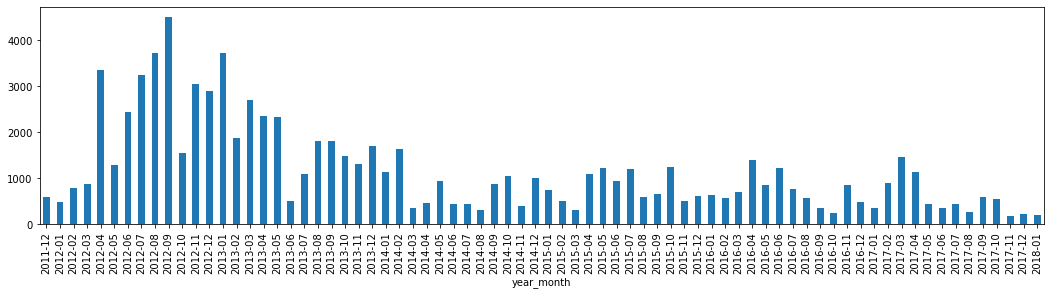

In [11]:
# Here, we want to visualize the activity of the project over the years to know if the project is still active.
# We do this by counting the number of pull requests made each month in a year.
%matplotlib inline

# Create a column to store the year and month
data['year_month'] = data['date'].dt.strftime('%Y-%m')

# Group by the year_month column and count the pull requests
counts = data.groupby(['year_month'])['pid'].count()

# Visualize the number pull requests
counts.plot(kind='bar', figsize = (18, 4))

In [12]:
data.head(10)

,pid,user,date,file,year_month
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java,2018-01
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala,2018-01
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala,2018-01
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check,2018-01
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java,2018-01
5,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumnImpl.java,2018-01
6,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/Test.scala,2018-01
7,163061502,joroKr21,2018-01-15 23:44:52+00:00,src/library/scala/concurrent/Lock.scala,2018-01
8,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/AsyncHelp...,2018-01
9,163057333,mkeskells,2018-01-15 23:05:06+00:00,src/compiler/scala/tools/nsc/profile/Profiler....,2018-01


### Distribution of pull requests submitted by each contributor.

array([[<AxesSubplot:title={'center':'pid'}>]], dtype=object)

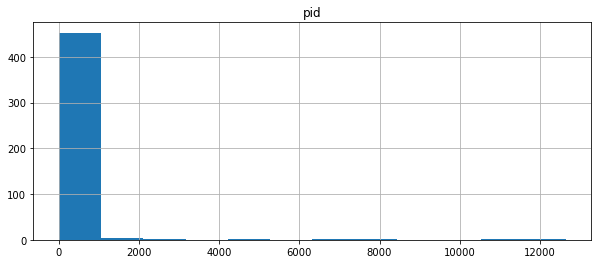

In [13]:
# Required for matplotlib
%matplotlib inline

# Group by the user column to count the number of pull requests submitted by a contributor
by_user = data.groupby('user').agg({'pid': 'count'})

# Plot the histogram to visualize
by_user.hist(bins = 12, figsize=(10, 4))

### The histogram shows that there are close to 1000 contributors that submitted more
### more than 400 pull requests.

In [14]:
by_user[0:20]

,pid
user,
0xmohit,2
193s,4
2m,20
4.00E+06,22
AlexeyIvanov8,2
Angelfirenze,1
Arneball,36
Atry,11
BartoszJanota,2


### Files changed in the last 10 pull requests.

In [15]:
# Get last 10 pull requests
last_10 = pulls.sort_values(by = 'date', ascending=False).head(10)
last_10

# Merge with the changed to get the files changed in the last 10 pull requests
joined_pr = pull_files.merge(last_10, on='pid')

joined_pr.head()


,pid,file,user,date
0,163314316,test/files/pos/t5638/Among.java,hrhino,2018-01-16 23:29:16+00:00
1,163314316,test/files/pos/t5638/Usage.scala,hrhino,2018-01-16 23:29:16+00:00
2,163314316,test/files/pos/t9291.scala,hrhino,2018-01-16 23:29:16+00:00
3,163314316,test/files/run/t8348.check,hrhino,2018-01-16 23:29:16+00:00
4,163314316,test/files/run/t8348/TableColumn.java,hrhino,2018-01-16 23:29:16+00:00


In [16]:
# Get the unique files
files = set(joined_pr['file'])

# Print the files
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

### Which contributors made the most pull requests to a given file?

In [17]:
# This is one of the most recently changed files
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the pull requests that changed the file
file_pr = data[data['file'] == file]

file_pr.head(10)

,pid,user,date,file,year_month
13,162838837,zuvizudar,2018-01-14 19:16:16+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2018-01
26951,22845163,retronym,2014-10-16 10:23:42+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2014-10
32753,12102550,xeno-by,2014-02-01 01:19:58+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2014-02
35420,10587633,retronym,2013-12-06 10:04:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2013-12
46700,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2013-04
47009,5291974,bjornregnell,2013-04-22 13:56:06+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2013-04
47567,5050360,retronym,2013-04-09 06:13:57+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2013-04
47965,5026775,retronym,2013-04-08 07:07:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2013-04
49156,4786005,starblood,2013-03-25 02:48:48+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2013-03
51313,4295399,retronym,2013-02-24 21:43:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2013-02


In [18]:
# Count the number of changes made by each contributor to get the 3 top
# contributors who changed the file
author_counts = file_pr.groupby('user').count()

# Print the top 3 developers
author_counts.nlargest(3, 'file')

,pid,date,file,year_month
user,,,,
xeno-by,11,11,11,11
retronym,5,5,5,5
soc,4,4,4,4


### Who made the last ten pull requests on a given file?

In [19]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pull_files[pull_files['file'] == file]

# Merge the obtained results with the pull requests dataframe
joined_pr = pulls.merge(file_pr, on='pid')

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

### Get the interesting contributors in recent times.

<AxesSubplot:xlabel='date'>

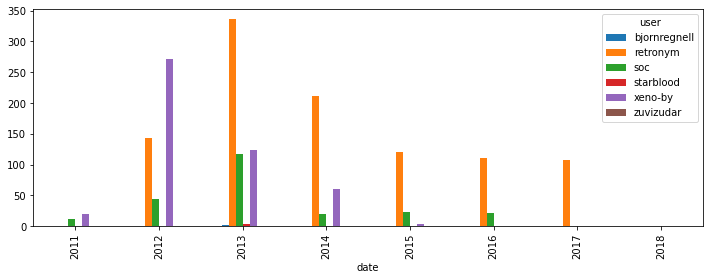

In [20]:
%matplotlib inline

# The developers we are interested in
authors = ['bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar']

# Get all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
counts_wide.plot(kind='bar', figsize=(12, 4))

In [21]:
by_author

,pid,user,date
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00
32,159290082,retronym,2017-12-19 22:42:32+00:00
37,158544936,retronym,2017-12-15 08:11:50+00:00
38,158541352,retronym,2017-12-15 07:46:53+00:00
39,158501418,retronym,2017-12-15 01:06:07+00:00
...,...,...,...
6183,552481,soc,2011-12-02 16:51:36+00:00
6184,551968,soc,2011-12-02 14:46:17+00:00
6189,551375,soc,2011-12-02 11:02:49+00:00
6190,550508,soc,2011-12-02 02:53:07+00:00


In [22]:
counts

,user,date,pid
0,bjornregnell,2013,2
1,retronym,2012,144
2,retronym,2013,336
3,retronym,2014,212
4,retronym,2015,120
5,retronym,2016,111
6,retronym,2017,107
7,soc,2011,12
8,soc,2012,44
9,soc,2013,117


In [23]:
counts_wide

user,bjornregnell,retronym,soc,starblood,xeno-by,zuvizudar
date,,,,,,
2011,0,0,12,0,20,0
2012,0,144,44,0,271,0
2013,2,336,117,4,123,0
2014,0,212,20,0,60,0
2015,0,120,24,0,3,0
2016,0,111,21,0,0,0
2017,0,107,0,0,0,0
2018,0,0,0,0,0,1
